<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física estadística </h1>
 <h2>Tarea 1</h2>
 <h3>Autor: Aquino Chapa Martha Abril<h3>
 </div>
 
 Hecho en Julia 🔴🟢🟣


In [1]:
using Plots
using LaTeXStrings
using DelimitedFiles
using ExcelFiles
using XLSX
using DataFrames
using StatsBase

#### Ejercicio 1:

Genera una gráfica de la frecuencia de soles $f(1)$ contra el número de volados $n$ que haz lanzado
hasta ese momento. Usa los datos obtenidos de:

a) 100 volados (Kerrich hizo 10,000 volados, 100 no son tantos).

b) 1000 volados utilizando un generador aleatorio (a computadora).

c) 10,000 volados utilizando un generador aleatorio (a computadora).

**Solución:**

a) Lanzando 100 veces una moneda, el número de soles obtenidos fuerón 61.

Para las secciones a y b, generamos una función que obtenga el número de soles (1) en una tirada de $n$ volados.

In [53]:
#Creamos una función que nos cuente el número de soles que hay en n tiradas aleatorias.
function num_soles(n)
    #El contador inicial de soles es 0
    sol=0
    #Iniciamos un ciclo, cada ciclo corresponde a una tirada
    for i in 1:n
        #Si sale 1, se anexa un sol al contador, si salió águila se suma 0 al contador
       sol+=rand((1,0))
    end
    #Le pedimos a la función que nos regrese el número totales de soles.
    return sol
end     

num_soles (generic function with 1 method)

Realizamos la gráfica de frecuencia

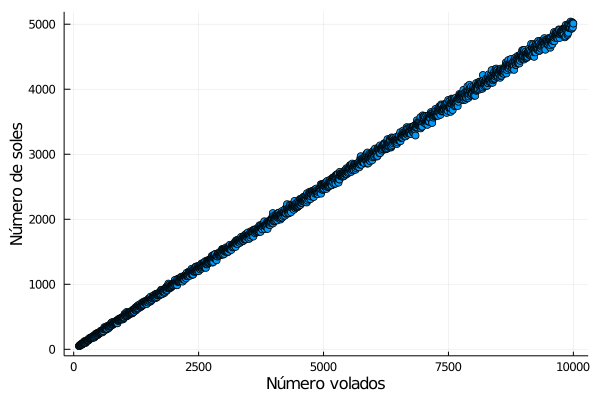

In [54]:
#Definimos el conjunto donde evaluaremos la función num_soles, es decir el conjunto de número de volados
volados=collect(100:5:10000)
#Creamos un arreglo vacío donde de anexarán el número de soles correspondiente a los volados del conjunto anterior
soles=[]
#Realizamos un ciclo donde se evalue la función num_soles en el i-ésimo elemento de los volados
for i in volados
    #anexamos al arreglo soles, el número de soles correspondientes a una tirada de i elementos
    push!(soles,num_soles(i))
end
#Graficamos el número de soles en función del número de tiradas, omitiendo el primer valor que corresponde 100 tiradas
#ya que a ese valor anexaremos el resultado obtenido "mecánicamente"
scatter(volados[2:end],soles[2:end],xlabel="Número volados",ylabel="Número de soles",marker=(:circle,4))
#Graficamos el resultado obtenido en el inciso a
scatter!(100,61,marker=(:circle,4),color=:red)
plot!(legend=false)

In [55]:
print("Con $(volados[91]) tiradas se obtuvo $(soles[91]) soles.")

Con 550 tiradas se obtuvo 287 soles.

In [56]:
print("Con $(volados[end]) tiradas se obtuvo $(soles[end]) soles.")

Con 10000 tiradas se obtuvo 5010 soles.

#### Ejercicio 4: Más de caminantes aleatorios... más alcohol
Para el sistema planteado en el inciso 3a), elabora 1000 listas (1000 caminantes) de 30 pasos cada
una. Utiliza para ello un código en tu lenguaje favorito (incluye a tu tarea como apéndice el código,
todo en un mismo pdf). Cada una de estas listas está conformada por instancias o realizaciones de
las siguientes variables aleatorias $X_i$:

$\{X_1, X_2,X_3, ...,X_{29}, X_{30}\}$
Nota: Para generar estas listas en Python, puedes utilizar la función “random.choices”. Por ejemplo,
la siguiente función regresa un arreglo con 30 realizaciones de números al azar de entre {−1, 0, 1},
donde las probabilidades son 1/3 para cada una de ellas:
random.chices ([ −1 , 0 , 1] , w eig h t s = (1/3 ,1/3 ,1/3 ) , k=30).

Cada uno de estos elementos es la magnitud de un paso, es decir, cada uno de los elementos $X_i$ de
la ec (2). Para obtener la trayectoria de la caminata lo  ́unico que tienes que hacer es ir sumando
sucesivamente cada uno de estos elementos (la posición final de la caminata es, entonces, la suma
total de todos esos resultados).

Nota que cada una de estas 1000 caminatas podemos entenderla como una realización de la variable
aleatoria $Y_i$ como la definimos en la ec. (1). De esta manera, esperamos que si tomáramos un número
infinito de realizaciones (es decir, caminatas), recobraríamos la estadística que obtuviste en el inciso
3a). Pero, ¿qué pasaría si el número de realizaciones es finito? Veamos:

a) Gráfica 20 de las (1000) listas junto con la desviación estándar de la expresión analítica que
encontraste para este sistema en el inciso 3a).

Iniciamos definiendo una función que nos diga si el caminante va hacia adelante o atrás en su n-ésimo paso.

In [2]:
#Definimos una función que nos simule una caminata de n pasos
function caminata(n)
    #Definimos los valores que puede tomar la caminata
    valores = [1,-1,0]
    #Definimos la probabilidad de cada valor
    probabilidad = [1/3,1/3,1/3]
    #Definimos un arreglo vacío que iremos llenando con los valores de la caminata
    pasos=[]
    #Iniciamos suponiendo que el caminante está en el paso 0 en 0
    push!(pasos,0)
    #Realizamos un ciclo donde se escoja de manera "aleatoria" si el caminante dio un paso adelante, atrás o no se movió
    push!(pasos,0)
    for i in 1:n
        #Definimos el paso en base a los valores que puede tomar y su probabilidad
        paso=sample(valores, Weights(probabilidad))
        #Anexamos la información del paso al arreglo pasos
        push!(pasos,paso)
    end
    #Le pedimos a la función que regrese la información de los pasos.
    return pasos
end

caminata (generic function with 1 method)

Aplicamos esta función $caminata$ 10000 veces, para caminatas de 30 pasos.

In [3]:
#Generamos una matriz donde la i-ésima columna corresponde a la i-ésima caminata
caminatas=zeros(31,1000)
#Generamos un ciclo para llenar las entradas de la matriz
for i in 1:1000
    for j in 1:31
    caminatas[j,i]=caminata(30)[j]
    end
end

Definimos ahora una función que nos de la posición.

In [4]:
#Listas son los arreglos de los pasos, f el número de pasos y c el número de columnas o caminantes
function posicion(listas,f,c)
    #Definimos una matriz donde anexaremos la función de la posición
    posicion=zeros(f,c)
    #Realizamos un ciclo para llenar cada columna de la matriz, que representada cada caminata
    for i in 1:c
        #Definimos la primera posicion para cada caminata, la cual corresponde al primer valor de la caminata
        posicion[1,i]=listas[1,i]
        #Abrimos un ciclo para encontrar la j-ésima posición de la i-ésima caminata
        for j in 2:f
            posicion[j,i]=listas[j,i]+posicion[j-1,i]
        end
    end
    #Le pedimos a la función que no
    return posicion
end

posicion (generic function with 1 method)

Aplicamos la función anterior a las caminatas obtenidas anteriormente

In [5]:
posiciones=posicion(caminatas,31,1000);

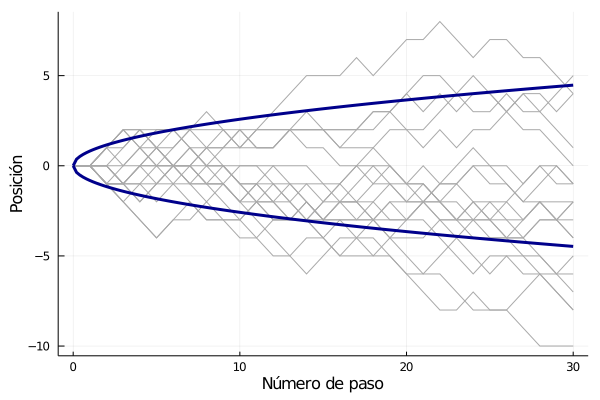

In [6]:
#Definimos el arreglo donde evaluaremos la expresión analítica de la desviación estándar
n=collect(0:0.2:30)
#Obtenemos el valor de la desviación estándar en el n-ésimo paso
des_estandar=(2*n/3).^(1/2)
#Definimos el arreglo que corresponde al número de pasos con lo que gráficaremos la posición
pas=collect(0:1:30)
#Graficamos las posiciones de los caminantes
plot(xlabel="Número de paso",ylabel="Posición")
#Gráficamos las posiciones de las primeras 20 caminatas
for j in 1:20
    plot!(pas,posiciones[:,j],label=false,color = :darkgrey)
end
#Graficamos la desviación estándar
plot!(n,des_estandar,lw = 3,label=false,color = :bluesreds)
plot!(n,-des_estandar,lw = 3,label=false,color=:bluesreds)
plot!()

Ahora, considerando los siguientes grupos de listas, calcula el promedio de la posición como
función del número de pasos y grafícalo.

* i Grupo 1: Incluye 5 caminatas.
* ii Grupo 2: Incluye 100 caminatas.
* iii Grupo 3: Incluye 500 caminatas.
* iv  Grupo 4: Incluye 1000 caminatas. 

Nota: Por ejemplo, para obtener el promedio de la posición dado el primer paso i = 1, del Grupo 1, necesitas sumar el primer elemento de cada una de las cinco primeras caminatas. Para obtener el promedio de la posición dados los primeros dos pasos del Grupo 1, necesitas sumar los segundos elementos de cada una de las cinco primeras caminatas; y así sucesivamente (como ejemplo, puedes ver la Tabla 1).

In [16]:
#Definimos una función para obtener el promedio de la posición
function promedio(posicion,n)
    #Definimos un arreglo para obtener el promedio de la posición
    promedio=zeros(31)
    #Realizamos un arreglo donde se obtendrá el promedio en el i-ésimo paso
    for i in 1:31
        for j in 1:n
            promedio[i]+=posicion[i,j]
        end
    end
    #Regresamos el valor promedio, donde se anuló el elemento del paso 0, debido a que sólo se a anexado por formalidad
    return promedio*(1/n)
end

promedio (generic function with 1 method)

In [25]:
#Obtenemos el promedio de las posiciones obtenidas anteriormente
promedios=promedio(posiciones[:,1:6],6);

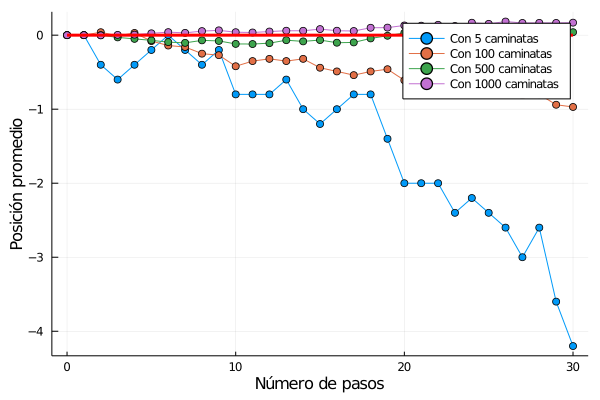

In [37]:
#Definimos los conjuntos de caminantes donde gráficaremos los resultados
caminantes=(5,100,500,1000)
#Definimos un arreglo de ceros para generar una línea promedio en 0
cero=zeros(31)
#Graficamos la función para los caminantes anteriores
plot(xlabel="Número de pasos",ylabel="Posición promedio")
for j in caminantes
    plot!(pas,promedio(posiciones[:,1:j],j),marker=:dot,label="Con $(j) caminatas")
end
plot!(collect(0:1:30),cero,lw=3,color = :red,label=false)
plot!()

Para la varianza, generamos una función que obtenga el valor de esta.

In [39]:
function varianza(pasos,c)
    promedios=promedio(pasos,c)
    var=zeros(31)
    for i in 1:31
        var[i]=0
        for j in 1:c
            var[i]+=(pasos[i,j]-(promedios[i]))^2
        end
    end
    return var/c
end

varianza (generic function with 1 method)

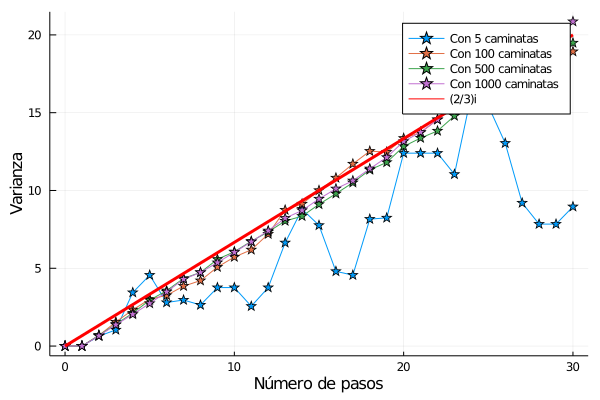

In [52]:
#Definimos el conjunto donde evaluaremos la varianza analítica
x=collect(0:0.5:30)
#Obtenemos la varianza analitica
var_analitica=(2/3)*x
#Graficamos la varianza para diversos conjuntos de caminatas
plot(xlabel="Número de pasos",ylabel="Varianza")
for j in caminantes
    plot!(pas,varianza(posiciones[:,1:j],j),marker=(:star,5),label="Con $(j) caminatas")
end
plot!(x,var_analitica,lw=3,color = :red,label="(2/3)i")
plot!()